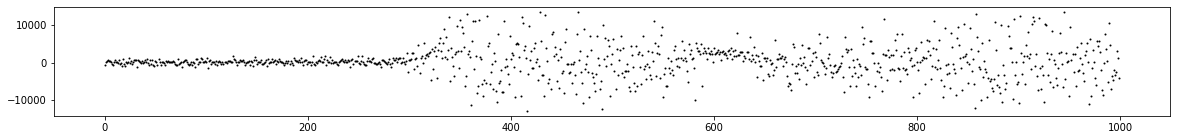

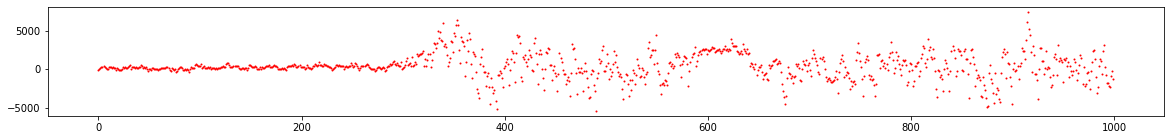

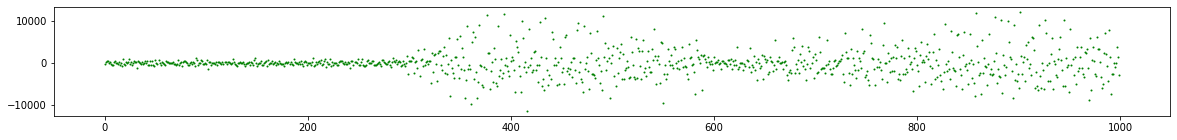

In [2]:
"""
@TODO
# Filterkoeffizienten
a = [ 0.4142, 0 ]
b = [ 0.2929, 0.2929, 0 ]
#a = [ 0.4142, 0 ]
#b = [ 0.2929, 0.2929, 0 ]
w = [ 0, 0, 0 ]

def filter( x ):
    global a,b,w
    w[0] = x + (a[0] * w[1]) + (a[1] * w[2])
    y = (b[0] * w[0]) + (b[1] * w[1]) + (b[2] * w[2])
    w[2] = w[1]
    w[1] = w[0]
    return y
"""


class LowPass:
    def __init__(self, b):
        self.b = b
        self.y = 0
        
    def filter(self, x):
        self.y += self.b * (x - self.y)
        return self.y

class HighPass:
    def __init__(self, b):
        self.b = b
        self.x = 0
        self.y = 0
        
    def filter( self, x ):
        self.y =  self.b * (self.y + (x-self.x))
        self.x = x
        return self.y



#==============================================================================
# Test

# Real data from ESP32 and microphone
aADCSamples = [32279, 33064, 33256, 33512, 33208, 33368, 32856, 32551, 32247, 32920, 33544, 33032, 33016, 32759, 33416, 32519, 32759, 31943, 33832, 32503, 32007, 32936, 32743, 32920, 34056, 32631, 33288, 32391, 32952, 33544, 33384, 33608, 31575, 33608, 33320, 32952, 32727, 33192, 32663, 33000, 33496, 33032, 33864, 32727, 32279, 33416, 32503, 33384, 32215, 31847, 33368, 32872, 32279, 33816, 32936, 32167, 33032, 32936, 32663, 32183, 33160, 33000, 33176, 33032, 32952, 33064, 32984, 33304, 32872, 32503, 32295, 32247, 33720, 32375, 32647, 32920, 31607, 32872, 33272, 33496, 33432, 33032, 32535, 32199, 32535, 33048, 32279, 32984, 32663, 31511, 33912, 33720, 32535, 33032, 33048, 34040, 33800, 33064, 32952, 33288, 33032, 34136, 31495, 33272, 33416, 32567, 32952, 33016, 33032, 32551, 33320, 32295, 33048, 33192, 32872, 32567, 33032, 32535, 33064, 33096, 32727, 33336, 33304, 33240, 32952, 33096, 34504, 33832, 33384, 32856, 32247, 33016, 33032, 33400, 33112, 33176, 33448, 32936, 32231, 32615, 32856, 32952, 33208, 32183, 33192, 32920, 32039, 33544, 34424, 33512, 32519, 32888, 32952, 32888, 33608, 32551, 32439, 32663, 32952, 33544, 32007, 33832, 32759, 33032, 33032, 33832, 33000, 33144, 33640, 32455, 33192, 32872, 33816, 33336, 33080, 33032, 32711, 32055, 32631, 33112, 32759, 33144, 32519, 33176, 32663, 32295, 34008, 33512, 33336, 33288, 32920, 33576, 33032, 33960, 33080, 32151, 33288, 33592, 33464, 32567, 32920, 32952, 32936, 32279, 33032, 34568, 32423, 32279, 33032, 32663, 33320, 33544, 33240, 34200, 32888, 32872, 33752, 34568, 32231, 33576, 32952, 32952, 34424, 32583, 33592, 32695, 33032, 33016, 33032, 32535, 32087, 32888, 33320, 33544, 33832, 33368, 33064, 33464, 32920, 32968, 33512, 33256, 31655, 33544, 33736, 32471, 33240, 33336, 33240, 34520, 32759, 32519, 33256, 34568, 33016, 32487, 32231, 32247, 33320, 34008, 33336, 33176, 33096, 33720, 33992, 32679, 32599, 32519, 32535, 32647, 32984, 32487, 31751, 33400, 33624, 33192, 33032, 32599, 32503, 33032, 33656, 32567, 31543, 32727, 34104, 33544, 33384, 34136, 33048, 33816, 34168, 34056, 32743, 32888, 34008, 33016, 32487, 33144, 35352, 30183, 33448, 33432, 33752, 35256, 35400, 30983, 33704, 34040, 31799, 37433, 30039, 33944, 34632, 32727, 38105, 34056, 34776, 35176, 34568, 35448, 35544, 28278, 36344, 30983, 35864, 37049, 34472, 28679, 36168, 38025, 39321, 35816, 33976, 37961, 41866, 34392, 39609, 33832, 36072, 45034, 27894, 36776, 34328, 32007, 29335, 35096, 35704, 42506, 35896, 31463, 44298, 35800, 42426, 40617, 36889, 26534, 29159, 45883, 34984, 35880, 34312, 21557, 38665, 43994, 31223, 43994, 34536, 24742, 26614, 44106, 34216, 33656, 27046, 24037, 28278, 27398, 45147, 37129, 38153, 26998, 30263, 32535, 25862, 35496, 33272, 25366, 22389, 40569, 27318, 27862, 30839, 24854, 24950, 43946, 31767, 33912, 31831, 29847, 27174, 39865, 33736, 35256, 34856, 31687, 23525, 37897, 38009, 37881, 34312, 30583, 23797, 44986, 43482, 36216, 37321, 33992, 19940, 29879, 42490, 33592, 35848, 31463, 31447, 36824, 38153, 33032, 33816, 28086, 31895, 46203, 38649, 29399, 29431, 23829, 45611, 36600, 33208, 27398, 28422, 25846, 40377, 40889, 34712, 36873, 35096, 27830, 33400, 25942, 36408, 34360, 29959, 30583, 24726, 38377, 41914, 32455, 32519, 29943, 30423, 32439, 27366, 32519, 33096, 29527, 24309, 40393, 46235, 33496, 35848, 30391, 27478, 22133, 41770, 31015, 32407, 34552, 30327, 23509, 39897, 36184, 29975, 28935, 27398, 25190, 29687, 39945, 34088, 32103, 25766, 27926, 20468, 42970, 33912, 39337, 31975, 34552, 38969, 37145, 23989, 32503, 35080, 39033, 30471, 25782, 36328, 29463, 33640, 36184, 39865, 30007, 36840, 29079, 30631, 30647, 32487, 30695, 26342, 25350, 37353, 34824, 31655, 27446, 25318, 37161, 26470, 35064, 35752, 31639, 27030, 34792, 39993, 31239, 31783, 28534, 32359, 35880, 31703, 29463, 28518, 35544, 33144, 43962, 38153, 29287, 35320, 37193, 35080, 28598, 40297, 42282, 23765, 29655, 31415, 26694, 26630, 34056, 31463, 30135, 33256, 30887, 29447, 36312, 37177, 33768, 32007, 34056, 31559, 34056, 38665, 33512, 36264, 34040, 33304, 30535, 27702, 37897, 35128, 36120, 33880, 33944, 31271, 22789, 38025, 36792, 35880, 35944, 34984, 37785, 26646, 35448, 36600, 35960, 35512, 33768, 36648, 35512, 35080, 35944, 35080, 32936, 36600, 35080, 35368, 35592, 36264, 35176, 35592, 33464, 35576, 35848, 35240, 35384, 34824, 34152, 35832, 36184, 35080, 36728, 33800, 35944, 34568, 36104, 34664, 40617, 34824, 34792, 35752, 35752, 35688, 33320, 34568, 33960, 35544, 35592, 33752, 39737, 33272, 34776, 33816, 37017, 32984, 34968, 28855, 34456, 33320, 31799, 32039, 35464, 28134, 34136, 34056, 33288, 34088, 29799, 29143, 33480, 32503, 32615, 29447, 30743, 38937, 31639, 33736, 33704, 35224, 34056, 34056, 34456, 31975, 33912, 34200, 33064, 29367, 26550, 27430, 27174, 25606, 32311, 37849, 37113, 29927, 31959, 30071, 32503, 28502, 34072, 32071, 37497, 32695, 34184, 31655, 27158, 30919, 36728, 36744, 32215, 33320, 35368, 28855, 35592, 34312, 30231, 29447, 40489, 37993, 33432, 33032, 32615, 32039, 29751, 31495, 39753, 33944, 34984, 32279, 30199, 28919, 29975, 31895, 32263, 30439, 30551, 31063, 31575, 31815, 32663, 34568, 28951, 24918, 39753, 36456, 35592, 36104, 31543, 26486, 36344, 29143, 33592, 31703, 29959, 26454, 33912, 28919, 32327, 31863, 29543, 42266, 37737, 39353, 31671, 31031, 30999, 27030, 23653, 38569, 38633, 35400, 35512, 32583, 26470, 30471, 32599, 30295, 31607, 28935, 25350, 35080, 44586, 34904, 34824, 28278, 36184, 34408, 30839, 34936, 31015, 34872, 30711, 38809, 36120, 40377, 31303, 31159, 27926, 34584, 40489, 31431, 35592, 30711, 31191, 29735, 36824, 35640, 33560, 34088, 31927, 23701, 32263, 36120, 36632, 32984, 30711, 24806, 33032, 38313, 33496, 34424, 34056, 27238, 34088, 38969, 35816, 38473, 34776, 28422, 31863, 36792, 43818, 31511, 36328, 30999, 33464, 38729, 31255, 28134, 23557, 26582, 41962, 32295, 29751, 32487, 30071, 25942, 40617, 36905, 32503, 31191, 30039, 24117, 39273, 42266, 37385, 34056, 31479, 25430, 34296, 43002, 34664, 35000, 32984, 27366, 32311, 42106, 36344, 30519, 33848, 27142, 20773, 45739, 39529, 35848, 31543, 31079, 22821, 38153, 29015, 33208, 30983, 30327, 23717, 28679, 38729, 28022, 28486, 25910, 25126, 28342, 43530, 36088, 26742, 29591, 26374, 24838, 42810, 22325, 32071, 29415, 25846, 27430, 42522, 39801, 36632, 36680, 33064, 23013, 44410, 29495, 33016, 27158, 27718, 21941, 45179, 35336, 29847, 32872, 34600, 27158, 37529, 34680, 40953, 34120, 35080, 31191, 43034, 45115, 43802, 32023, 35080, 29175, 25446, 44778, 31255, 25878, 31831, 29431, 22389, 43066, 42938, 35320, 29527, 33720, 27590, 35064, 41242, 26406, 33496, 32535, 28727, 26886, 31495, 35416, 40713, 35592, 32519, 26390, 46315, 28310, 35416, 32920, 33304, 23893, 42250, 33464, 35192, 30391, 35208, 26598, 37049, 30455, 30711, 34072, 38137, 32567, 30007, 27830, 34936, 35816, 38153, 33032, 21813, 39193, 23813, 31447, 36136, 32984, 28630, 26886, 38681, 37225, 38665, 35656, 30807, 25446, 24261, 32695, 40457, 36472, 33144, 27734, 43274, 37641, 25702, 29239, 28086, 30839, 29495, 30247, 35864, 34104, 28662]
aADCSamples = [x -2**15 for x in aADCSamples ]

sampleLength = len( aADCSamples )

# zum durchnummerieren
aX = [x for x in range(sampleLength)]


#==============================================================================
# Apply filter:
lowPass  = LowPass ( 0.27 )
highPass = HighPass( 0.7)

aYFilterLow  = [ lowPass .filter( x ) for x in aADCSamples ]
aYFilterHigh = [ highPass.filter( x ) for x in aADCSamples ]


#==============================================================================
# Plot:

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
#plt.ylim(-1000,1000)
plt.scatter(aX, aADCSamples, s=1, marker='o', color="black" )
plt.show()

plt.figure(figsize=(20, 2))
plt.scatter(aX, aYFilterLow,  s=1, marker='o', color="red" )
plt.show()

plt.figure(figsize=(20, 2))
plt.scatter(aX, aYFilterHigh, s=1, marker='o', color="green" )
plt.show()
